# Дескрипторы

Допустим, у нас есть простой класс Person:

In [2]:
class Person:
    def __init__(self, name):
        self.name = name
        
worker1 = Person("jane")
worker1.name

'jane'

Мы хотим, чтобы после присвоении нового имени первая буква была заглавной. <span style="background: #ccff00;">Самый известный способ - превратить атрибут в свойство (метод, доступ к которому осуществляется через интерфейс атрибута) с помощью декоратора `@property`</span>: 

In [24]:
class Person:
    def __init__(self, name):
        self.name = name
    
    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, value):
        self._name = value.capitalize()
        
worker1 = Person("jane")
worker1.name

'Jane'

<span style="background: #3fffbc;">Под каптом работы этого декоратора лежит переопределение **dunder methods**/**magic methods**, которые отвечают за изменение поведения при доступе к атрибутам. Такие методы называются **дескрипторами**</span>. Ипользование дексрипторов `__getattr__`, `__setattr__`, `__delattr__` - более низкоуровневый механизм задания, получения, удаления атрибутов и превращения их в свойства. 

<i>If you need a <span style="background: #ccff00;">simple way to return</span> a computed value from an attribute read, or to <span style="background: #ccff00;">call a function on an attribute write</span>, use the <span style="background: #ccff00; font-weight: bold; font-style: monospace;">@property</span> decorator. The <span style="background: #3fffbc;">descriptor API is more flexible, but less convenient, and arguably "overkill"</span> and non-idiomatic in this situation. It's <span style="background: #3fffbc;">useful for more advanced use cases, like implementing bound methods, or static and class methods</span>; when you need to know, for example, if the attribute was accessed through the type object, or an instance of the type.</i>

In [33]:
class Person:
    def __init__(self, name="какое-то имя", age=2):
        self.name = name
        self.age = age
    
    def __setattr__(self, attr, value):
        print(f"attr={attr}")
        if attr == 'name':
            print("Добавляем заглавную букву")
            super().__setattr__(attr, value.capitalize())
            print(f"Теперь имя {self.name}")
        else:
            print("Вызываем обычный __setattr__(self, attr, value) без изменний")
            super().__setattr__(attr, value)
        print('-----')
        
            
pers = [Person("борис", 32), Person("Маша"), Person()]

attr=name
Добавляем заглавную букву
Теперь имя Борис
-----
attr=age
Вызываем обычный __setattr__(self, attr, value) без изменний
-----
attr=name
Добавляем заглавную букву
Теперь имя Маша
-----
attr=age
Вызываем обычный __setattr__(self, attr, value) без изменний
-----
attr=name
Добавляем заглавную букву
Теперь имя Какое-то имя
-----
attr=age
Вызываем обычный __setattr__(self, attr, value) без изменний
-----


In [37]:
pers[0].name = 'для атрибута age __setattr__ не будет вызыван'

attr=name
Добавляем заглавную букву
Теперь имя Для атрибута age __setattr__ не будет вызыван
-----


Если похожим образом нужно переопределить атрибуты не только одного класса, а нескольких, то лучше запихнуть переопределенные дескрипторы в отдельный класс, чтобы не дублировать код:

In [ ]:
class Person:
    first_name = CapitalizedValue()
    last_name = CapitalizedValue()
    
    def __init__(self, fisrt_name, last_name):
        self.first_name = first_name
        self.last_name = last_name

Есть также дескрипторы-тезки: 
- `__get__(self, instance, owner)` −
- `__set__(self, instance, value)` −
- `__delete__(self, instance)` − 
- `__set_name__(self, owner, name)` − вызывается только при создании класса

Дескрипторы можно разделить на несколько типов:
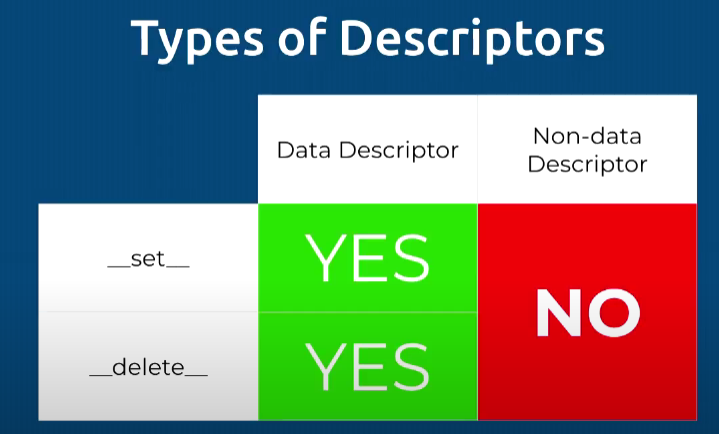

**Non-data descriptors**: `staticmethod`, `classmethod`, `abc.abstractmethod`, `functools.partialmethod`

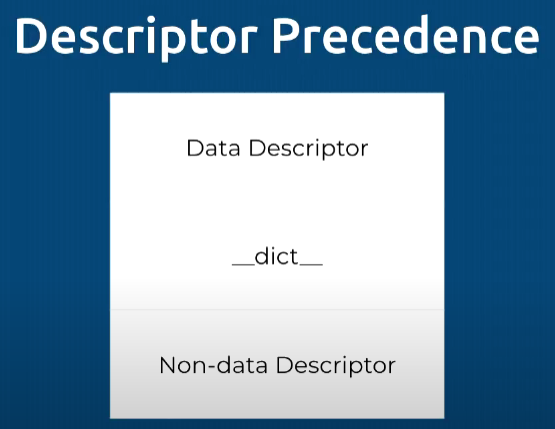

-------------------

In [49]:
class A:
    pass

class B:
    x = 1
    y = A()

b1 = B()
print(f"b1.x = {b1.x}, \nb1.y = {b1.y}, \nb1.__dict__ = {b1.__dict__}, \nB.__dict__ = {B.__dict__}")

b1.x = 1, 
b1.y = <__main__.A object at 0x0000020AB6A795E0>, 
b1.__dict__ = {}, 
B.__dict__ = {'__module__': '__main__', 'x': 1, 'y': <__main__.A object at 0x0000020AB6A795E0>, '__dict__': <attribute '__dict__' of 'B' objects>, '__weakref__': <attribute '__weakref__' of 'B' objects>, '__doc__': None}


Заметим, что мы достучались к **атрибутам класса** `B.x` и `B.y` через экземпляр `b1`, хотя в словаре экземпляра их нет.

In [ ]:
class B:
    def __get__(self, obj, objtype=None):
        print("Запуск метода __get__")
        return 2